# Load packages

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>")) #Set scaling for the jupyter notebook cell width - make them bigger

/tmp/ipykernel_367/3983057131.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import os
import re
import sys
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.ticker import MaxNLocator

path_skin_scripts = '/mnt/g/My Drive/Python/Projects'
sys.path.append(path_skin_scripts)
from Skin_scripts import *

# Figure S2

In [3]:
def read_and_adjust(path, file):
    tmp = pd.read_csv(os.path.join(path, file), index_col = 0)
    tmp = pd.DataFrame(tmp.loc['Total'][:-4]).T
    tmp.columns = ['Basal cells', 'Basal GFP', 'Basal K10', 'Basal K14-', 'K10+GFP', 'K10+K14', 'K14+GFP+K10', 'K14+GFP', 'K10-Dim', 'GFP-Dim']
    tmp.index = [file]
    return tmp

In [4]:
path = '/mnt/x/karlan/Imaging/Greco/Experiment2_20210915/Counting results'
fig_path = '/mnt/g/My Drive/MKA/Papers/Greco/Katie/Figure_output/Rebuttal'

In [6]:
files = [f for f in os.listdir(path) if 'Results_' in f]
df_raw = pd.concat([pd.DataFrame(read_and_adjust(path, f)) for f in files])

In [7]:
df_raw['ID'] = [x.split('_')[1] for x in df_raw.index]
df_raw['Geno'] = [x.split('_')[2] for x in df_raw.index]
df_raw['Tissue'] = [x.split('_')[3] for x in df_raw.index]
df_raw['Slide'] = [x.split('_')[4] for x in df_raw.index]
df_raw['Date'] = [x.split('_')[5] for x in df_raw.index]
df_raw['Zstack'] = [x.split('_')[10] for x in df_raw.index]
df_raw

,Basal cells,Basal GFP,Basal K10,Basal K14-,K10+GFP,K10+K14,K14+GFP+K10,K14+GFP,K10-Dim,GFP-Dim,ID,Geno,Tissue,Slide,Date,Zstack
Results_F2-3045_K10-H2BGFP_ds_sl2_20210915_WGA-405_GFP-488_Krt14-mRNA-Cy3_Krt10-mRNA-Cy5_Zstack1_60x-WI_Tweety_MIP.csv,77.0,41.0,41.0,8.0,41.0,33.0,33.0,0.0,6.0,20.0,F2-3045,K10-H2BGFP,ds,sl2,20210915,Zstack1
Results_F3-3045_K10-H2BGFP_ds_sl2_20210915_WGA-405_GFP-488_Krt14-mRNA-Cy3_Krt10-mRNA-Cy5_Zstack1_60x-WI_Tweety_MIP.csv,85.0,30.0,37.0,9.0,30.0,27.0,22.0,0.0,6.0,9.0,F3-3045,K10-H2BGFP,ds,sl2,20210915,Zstack1
Results_F3-3045_K10-H2BGFP_ear_sl2_20210915_WGA-405_GFP-488_Krt14-mRNA-Cy3_Krt10-mRNA-Cy5_Zstack2_60x-WI_Tweety_MIP.csv,206.0,91.0,81.0,18.0,80.0,64.0,64.0,10.0,18.0,29.0,F3-3045,K10-H2BGFP,ear,sl2,20210915,Zstack2
Results_F2-3045_K10-H2BGFP_ear_sl2_20210915_WGA-405_GFP-488_Krt14-mRNA-Cy3_Krt10-mRNA-Cy5_Zstack1_60x-WI_Tweety_MIP.csv,178.0,84.0,90.0,22.0,78.0,69.0,58.0,5.0,27.0,25.0,F2-3045,K10-H2BGFP,ear,sl2,20210915,Zstack1
Results_F3-3045_K10-H2BGFP_ear_sl2_20210915_WGA-405_GFP-488_Krt14-mRNA-Cy3_Krt10-mRNA-Cy5_Zstack1_60x-WI_Tweety_MIP.csv,156.0,63.0,66.0,12.0,53.0,53.0,43.0,10.0,15.0,17.0,F3-3045,K10-H2BGFP,ear,sl2,20210915,Zstack1
Results_M1-3045_K10-H2BGFP_ds_sl2_20210915_WGA-405_GFP-488_Krt14-mRNA-Cy3_Krt10-mRNA-Cy5_Zstack1_60x-WI_Tweety_MIP.csv,81.0,24.0,30.0,12.0,23.0,18.0,12.0,1.0,5.0,5.0,M1-3045,K10-H2BGFP,ds,sl2,20210915,Zstack1
Results_M1-3045_K10-H2BGFP_ds_sl2_20210915_WGA-405_GFP-488_Krt14-mRNA-Cy3_Krt10-mRNA-Cy5_Zstack2_60x-WI_Tweety_MIP.csv,121.0,26.0,44.0,6.0,25.0,37.0,20.0,0.0,13.0,2.0,M1-3045,K10-H2BGFP,ds,sl2,20210915,Zstack2
Results_M1-3045_K10-H2BGFP_ear_sl2_20210915_WGA-405_GFP-488_Krt14-mRNA-Cy3_Krt10-mRNA-Cy5_Zstack1_60x-WI_Tweety_MIP.csv,62.0,33.0,24.0,5.0,22.0,20.0,19.0,9.0,8.0,11.0,M1-3045,K10-H2BGFP,ear,sl2,20210915,Zstack1
Results_M1-3045_K10-H2BGFP_ear_sl2_20210915_WGA-405_GFP-488_Krt14-mRNA-Cy3_Krt10-mRNA-Cy5_Zstack2_60x-WI_Tweety.csv,93.0,44.0,35.0,7.0,25.0,29.0,21.0,15.0,14.0,11.0,M1-3045,K10-H2BGFP,ear,sl2,20210915,Zstack2


In [8]:
id_cols = ['ID','Geno','Tissue', 'Slide','Date']

In [9]:
df = df_raw.groupby(by = id_cols, as_index = False).sum()
df

,ID,Geno,Tissue,Slide,Date,Basal cells,Basal GFP,Basal K10,Basal K14-,K10+GFP,K10+K14,K14+GFP+K10,K14+GFP,K10-Dim,GFP-Dim
0,F2-3045,K10-H2BGFP,ds,sl2,20210915,77.0,41.0,41.0,8.0,41.0,33.0,33.0,0.0,6.0,20.0
1,F2-3045,K10-H2BGFP,ear,sl2,20210915,178.0,84.0,90.0,22.0,78.0,69.0,58.0,5.0,27.0,25.0
2,F3-3045,K10-H2BGFP,ds,sl2,20210915,85.0,30.0,37.0,9.0,30.0,27.0,22.0,0.0,6.0,9.0
3,F3-3045,K10-H2BGFP,ear,sl2,20210915,362.0,154.0,147.0,30.0,133.0,117.0,107.0,20.0,33.0,46.0
4,M1-3045,K10-H2BGFP,ds,sl2,20210915,202.0,50.0,74.0,18.0,48.0,55.0,32.0,1.0,18.0,7.0
5,M1-3045,K10-H2BGFP,ear,sl2,20210915,155.0,77.0,59.0,12.0,47.0,49.0,40.0,24.0,22.0,22.0


## Select gray levels

In [10]:
cmap = sbn.color_palette(palette = 'Greys', n_colors=5)[::3]
sbn.color_palette(cmap)

[(0.9125259515570934, 0.9125259515570934, 0.9125259515570934),
 (0.40784313725490196, 0.40784313725490196, 0.40784313725490196)]

## Basal K10, GFP and K14 cells

In [11]:
columns = ['Basal cells', 'Basal GFP', 'Basal K10', 'Basal K14-', 'K10+GFP', 'K10+K14', 'K14+GFP+K10', 'K14+GFP', 'K10-Dim', 'GFP-Dim']
basal_perc = df.copy()
basal_perc[columns] = pd.DataFrame([basal_perc[c].div(basal_perc[columns[0]])*100 for c in columns], index = columns).T
basal_perc['Basal K14'] = 100-basal_perc['Basal K14-']
basal_perc

,ID,Geno,Tissue,Slide,Date,Basal cells,Basal GFP,Basal K10,Basal K14-,K10+GFP,K10+K14,K14+GFP+K10,K14+GFP,K10-Dim,GFP-Dim,Basal K14
0,F2-3045,K10-H2BGFP,ds,sl2,20210915,100.0,53.246753,53.246753,10.389610,53.246753,42.857143,42.857143,0.000000,7.792208,25.974026,89.610390
1,F2-3045,K10-H2BGFP,ear,sl2,20210915,100.0,47.191011,50.561798,12.359551,43.820225,38.764045,32.584270,2.808989,15.168539,14.044944,87.640449
2,F3-3045,K10-H2BGFP,ds,sl2,20210915,100.0,35.294118,43.529412,10.588235,35.294118,31.764706,25.882353,0.000000,7.058824,10.588235,89.411765
3,F3-3045,K10-H2BGFP,ear,sl2,20210915,100.0,42.541436,40.607735,8.287293,36.740331,32.320442,29.558011,5.524862,9.116022,12.707182,91.712707
4,M1-3045,K10-H2BGFP,ds,sl2,20210915,100.0,24.752475,36.633663,8.910891,23.762376,27.227723,15.841584,0.495050,8.910891,3.465347,91.089109
5,M1-3045,K10-H2BGFP,ear,sl2,20210915,100.0,49.677419,38.064516,7.741935,30.322581,31.612903,25.806452,15.483871,14.193548,14.193548,92.258065


In [12]:
basal1 = basal_perc.melt(id_vars = ['ID','Geno','Tissue','Slide','Date'], value_vars = ['Basal GFP','Basal K10', 'Basal K14'], var_name = 'Staining', value_name = 'Percentage')
basal1

,ID,Geno,Tissue,Slide,Date,Staining,Percentage
0,F2-3045,K10-H2BGFP,ds,sl2,20210915,Basal GFP,53.246753
1,F2-3045,K10-H2BGFP,ear,sl2,20210915,Basal GFP,47.191011
2,F3-3045,K10-H2BGFP,ds,sl2,20210915,Basal GFP,35.294118
3,F3-3045,K10-H2BGFP,ear,sl2,20210915,Basal GFP,42.541436
4,M1-3045,K10-H2BGFP,ds,sl2,20210915,Basal GFP,24.752475
5,M1-3045,K10-H2BGFP,ear,sl2,20210915,Basal GFP,49.677419
6,F2-3045,K10-H2BGFP,ds,sl2,20210915,Basal K10,53.246753
7,F2-3045,K10-H2BGFP,ear,sl2,20210915,Basal K10,50.561798
8,F3-3045,K10-H2BGFP,ds,sl2,20210915,Basal K10,43.529412
9,F3-3045,K10-H2BGFP,ear,sl2,20210915,Basal K10,40.607735


## K10+GFP+ basal cells

In [13]:
basal_perc['K14-GFP+K10+'] = basal_perc['K10+GFP']-basal_perc['K14+GFP+K10']
replace_dict = {'K10+GFP': 'All\nK10+\nGFP+',
                'K10+K14': 'All\nK10+\nK14+',
                'K14+GFP+K10': 'K14+\nGFP+\nK10+',
                'K14+GFP': 'K14+\nGFP+\nK10-',
                'K14-GFP+K10+': 'K14-\nGFP+\nK10+'}

In [14]:
basal2 = basal_perc.melt(id_vars = ['ID','Geno','Tissue','Slide','Date'], value_vars = ['K10+GFP', 'K10+K14', 'K14+GFP+K10', 'K14+GFP', 'K14-GFP+K10+'], var_name = 'Staining', value_name = 'Percentage')
basal2['Staining'] = basal2['Staining'].replace(replace_dict)
basal2

,ID,Geno,Tissue,Slide,Date,Staining,Percentage
0,F2-3045,K10-H2BGFP,ds,sl2,20210915,All\nK10+\nGFP+,53.246753
1,F2-3045,K10-H2BGFP,ear,sl2,20210915,All\nK10+\nGFP+,43.820225
2,F3-3045,K10-H2BGFP,ds,sl2,20210915,All\nK10+\nGFP+,35.294118
3,F3-3045,K10-H2BGFP,ear,sl2,20210915,All\nK10+\nGFP+,36.740331
4,M1-3045,K10-H2BGFP,ds,sl2,20210915,All\nK10+\nGFP+,23.762376
5,M1-3045,K10-H2BGFP,ear,sl2,20210915,All\nK10+\nGFP+,30.322581
6,F2-3045,K10-H2BGFP,ds,sl2,20210915,All\nK10+\nK14+,42.857143
7,F2-3045,K10-H2BGFP,ear,sl2,20210915,All\nK10+\nK14+,38.764045
8,F3-3045,K10-H2BGFP,ds,sl2,20210915,All\nK10+\nK14+,31.764706
9,F3-3045,K10-H2BGFP,ear,sl2,20210915,All\nK10+\nK14+,32.320442


## Combined basal GFP, K10, K10/GFP

In [38]:
basal_comb = pd.concat([basal1, basal2[basal2['Staining']=='All\nK10+\nGFP+']])
basal_comb

,ID,Geno,Tissue,Slide,Date,Staining,Percentage
0,F2-3045,K10-H2BGFP,ds,sl2,20210915,Basal GFP,53.246753
1,F2-3045,K10-H2BGFP,ear,sl2,20210915,Basal GFP,47.191011
2,F3-3045,K10-H2BGFP,ds,sl2,20210915,Basal GFP,35.294118
3,F3-3045,K10-H2BGFP,ear,sl2,20210915,Basal GFP,42.541436
4,M1-3045,K10-H2BGFP,ds,sl2,20210915,Basal GFP,24.752475
5,M1-3045,K10-H2BGFP,ear,sl2,20210915,Basal GFP,49.677419
6,F2-3045,K10-H2BGFP,ds,sl2,20210915,Basal K10,53.246753
7,F2-3045,K10-H2BGFP,ear,sl2,20210915,Basal K10,50.561798
8,F3-3045,K10-H2BGFP,ds,sl2,20210915,Basal K10,43.529412
9,F3-3045,K10-H2BGFP,ear,sl2,20210915,Basal K10,40.607735


## 2B

[<AxesSubplot:>]


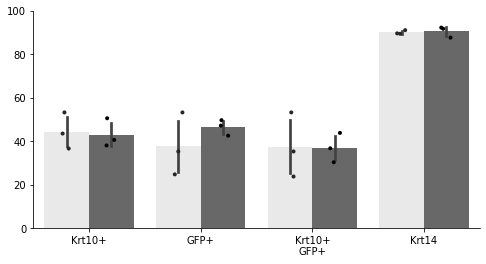

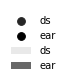

In [40]:
fig, ax = plt.subplots(figsize = (8,4))
sbn.barplot(data = basal_comb, x = 'Staining', y = 'Percentage', hue = 'Tissue', ax = ax, palette = cmap, ci = 'sd', 
            order = ['Basal K10', 'Basal GFP', 'All\nK10+\nGFP+', 'Basal K14'])

sbn.stripplot(data = basal_comb, x = 'Staining', y = 'Percentage', hue = 'Tissue', ax = ax, order = ['Basal K10', 'Basal GFP', 'All\nK10+\nGFP+', 'Basal K14'], color = 'k', s = 4, dodge = 1)
ax.set_ylabel('')
ax.set_ylim([0,100])
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
ax.set_xlabel('')
[ax.spines[spine].set_visible(False) for spine in ['top','right']]
ax.set_xticklabels(['Krt10+','GFP+', 'Krt10+\nGFP+','Krt14'])

#fig.savefig(os.path.join(fig_path, 'K10_GFP_Krt14_basal_cells_v3.pdf'), bbox_inches = 'tight', dpi = 600)

fig, ax = plt.subplots(figsize = (0.1, 0.1))
ax.legend(handles = handles, labels = labels, frameon = False)
clean_axis(ax)

## 2C

In [41]:
tmp = df[['ID','Geno','Tissue','Slide','Date']].copy()
col1 = 'K10+GFP+\nin all\nK10'
col2 = 'K10+GFP+\nin all\nGFP'
col3 = 'K10+GFP+K14+\nin all\nK10+GFP+'
tmp[col1] = df['K10+GFP'].div(df['Basal K10'])*100
tmp[col2] = df['K10+GFP'].div(df['Basal GFP'])*100
tmp[col3] = df['K14+GFP+K10'].div(df['K10+GFP'])*100
tmp = tmp.melt(id_vars = ['ID','Geno','Tissue','Slide','Date'], value_vars = [col1, col2, col3], 
         var_name = 'Staining', value_name = 'Percentage')
tmp

,ID,Geno,Tissue,Slide,Date,Staining,Percentage
0,F2-3045,K10-H2BGFP,ds,sl2,20210915,K10+GFP+\nin all\nK10,100.000000
1,F2-3045,K10-H2BGFP,ear,sl2,20210915,K10+GFP+\nin all\nK10,86.666667
2,F3-3045,K10-H2BGFP,ds,sl2,20210915,K10+GFP+\nin all\nK10,81.081081
3,F3-3045,K10-H2BGFP,ear,sl2,20210915,K10+GFP+\nin all\nK10,90.476190
4,M1-3045,K10-H2BGFP,ds,sl2,20210915,K10+GFP+\nin all\nK10,64.864865
5,M1-3045,K10-H2BGFP,ear,sl2,20210915,K10+GFP+\nin all\nK10,79.661017
6,F2-3045,K10-H2BGFP,ds,sl2,20210915,K10+GFP+\nin all\nGFP,100.000000
7,F2-3045,K10-H2BGFP,ear,sl2,20210915,K10+GFP+\nin all\nGFP,92.857143
8,F3-3045,K10-H2BGFP,ds,sl2,20210915,K10+GFP+\nin all\nGFP,100.000000
9,F3-3045,K10-H2BGFP,ear,sl2,20210915,K10+GFP+\nin all\nGFP,86.363636


[<AxesSubplot:>]


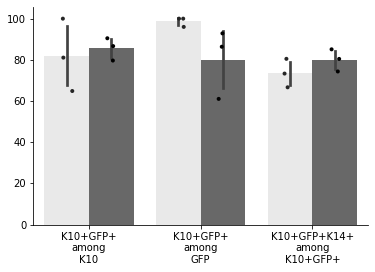

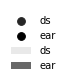

In [43]:
fig, ax = plt.subplots(figsize = (6,4))
sbn.barplot(data = tmp, x = 'Staining', y = 'Percentage', hue = 'Tissue', ax = ax, palette = cmap, ci = 'sd', order = [col1, col2, col3])
sbn.stripplot(data = tmp, x = 'Staining', y = 'Percentage', hue = 'Tissue', ax = ax, color = 'k', order = [col1, col2, col3], dodge = 1, s = 4)
ax.set_ylabel('')
#ax.set_ylim([0,100])
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
ax.set_xlabel('')
[ax.spines[spine].set_visible(False) for spine in ['top','right']]
ax.set_xticklabels(['K10+GFP+\namong\nK10', 'K10+GFP+\namong\nGFP','K10+GFP+K14+\namong\nK10+GFP+'])

#fig.savefig(os.path.join(fig_path, 'K10-GFP-K14_among_all_K10_or_GFP_cells_v3.pdf'), bbox_inches = 'tight', dpi = 600)

fig, ax = plt.subplots(figsize = (0.1, 0.1))
ax.legend(handles = handles, labels = labels, frameon = False)
clean_axis(ax)

# Figure S8

In [44]:
path = "/mnt/x/karlan/Imaging/Greco/Experiment5_6/K14_K10_GFP/Counting"
files = [x for x in os.listdir(path) if 'Results_' in x and '.tsv' in x]

In [45]:
#Order of counter names from imagej cell counter
type_names = {1: 'Basal_cells',
              2: 'Basal_GFP+',
              3: 'Basal_K10+',
              4: 'Basal_K14-',
              5: 'Suprabasal GFP',
              6: 'Suprabasal K14',
              7: 'K10-dim',
              8: 'K14-dim'}

## Compile results

In [46]:
#Make a regular expression for getting sample metadata from image name
p = re.compile(r'Results_(?P<Geno>[A-Z0-9]{3,6})_(?P<Mouse>[0-9]{1})_22_(?P<Slide>sl[0-9]{1})_(?P<Tissue>[a-zA-Z]{2,3})_(?P<Date>[0-9]{8})_.*_(?P<Zstack>Zstack[0-9]{1,2})_(?P<Objective>[0-9]{2}x).*.tsv', re.IGNORECASE)
tmp = {}
for f in files:
    tmp[f] = pd.read_table(os.path.join(path, f), index_col = None, decimal = ',')
    m = p.match(f)
    for col, val in m.groupdict().items():
        tmp[f][col] = val
    tmp[f]['Filename'] = f
raw_df = pd.concat(tmp.values())

raw_df['Type_name'] = raw_df['Type'].apply(lambda x: type_names[x])

raw_df.head()

,Type,Slice,X,Y,Value,C-pos,Z-pos,T-pos,X(micron),Y(micron),Z(micron),Geno,Mouse,Slide,Tissue,Date,Zstack,Objective,Filename,Type_name
0,1,1,7971,1174,129.0,1,1,1,2990.758,440.490,0.0,CDKN1B,1,sl4,Ds,20220422,Zstack1,30x,Results_CDKN1B_1_22_sl4_Ds_20220422_Ki67-405_G...,Basal_cells
1,1,1,7959,1166,134.0,1,1,1,2986.255,437.489,0.0,CDKN1B,1,sl4,Ds,20220422,Zstack1,30x,Results_CDKN1B_1_22_sl4_Ds_20220422_Ki67-405_G...,Basal_cells
2,1,1,7948,1173,126.0,1,1,1,2982.128,440.115,0.0,CDKN1B,1,sl4,Ds,20220422,Zstack1,30x,Results_CDKN1B_1_22_sl4_Ds_20220422_Ki67-405_G...,Basal_cells
3,1,1,7922,1173,114.0,1,1,1,2972.373,440.115,0.0,CDKN1B,1,sl4,Ds,20220422,Zstack1,30x,Results_CDKN1B_1_22_sl4_Ds_20220422_Ki67-405_G...,Basal_cells
4,1,1,7902,1181,116.0,1,1,1,2964.868,443.117,0.0,CDKN1B,1,sl4,Ds,20220422,Zstack1,30x,Results_CDKN1B_1_22_sl4_Ds_20220422_Ki67-405_G...,Basal_cells


## Annotate basal cells

In [47]:
df = raw_df[raw_df['Type_name']=='Basal_cells']
b = df[['X','Y']].values
for i in raw_df['Type'].unique():
    if i != 1:
        tmp = raw_df[raw_df['Type']==i]
        a = tmp[['X','Y']].values
        name = np.unique(tmp['Type_name'])[0]
        df[name] = False
        
        ixs = np.argmin(scipy.spatial.distance_matrix(a, b), axis = 1)
        df[name].iloc[ixs] = True
clear_output()

## Make combined annotations

In [48]:
df['Basal_K14+'] = ~df['Basal_K14-']
df['K10-high'] = df['Basal_K10+'] & ~df['K10-dim']
df['GFP+_K10+'] = df['Basal_K10+'] & df['Basal_GFP+']
df['GFP+_K14+'] = df['Basal_K14+'] & df['Basal_GFP+']
df['K14+_K10+'] = df['Basal_K10+'] & df['Basal_K14+']
df['GFP+_K10+_K14+'] = df['Basal_K10+'] & df['Basal_GFP+'] & df['Basal_K14+']

df['GFP+_K10-'] = ~df['K10-high'] & df['Basal_GFP+']
df['GFP-_K10+'] = df['Basal_K10+'] & ~df['Basal_GFP+']
df['GFP+_K14-'] = df['Basal_K14-'] & df['Basal_GFP+']
df['GFP-_K14+'] = df['Basal_K14+'] & ~df['Basal_GFP+']
df['K14+_K10-'] = ~df['K10-high'] & df['Basal_K14+']
df['K14-_K10+'] = df['Basal_K10+'] & df['Basal_K14-']

df['GFP+_K10+_K14-'] = df['Basal_GFP+'] & df['Basal_K10+'] & df['Basal_K14-']
df['GFP+_K10-_K14+'] = df['Basal_GFP+'] & ~df['K10-high'] & df['Basal_K14+']
df['GFP-_K10+_K14+'] = ~df['Basal_GFP+'] & df['Basal_K10+'] & df['Basal_K14+']

df['GFP+_K10-_K14-'] = df['Basal_GFP+'] & ~df['K10-high'] & df['Basal_K14-']
df['GFP-_K10+_K14-'] = ~df['Basal_GFP+'] & df['K10-high'] & df['Basal_K14-']
df['GFP-_K10-_K14+'] = ~df['Basal_GFP+'] & ~df['K10-high'] & df['Basal_K14+']

df['GFP+_K10-dim'] = df['K10-dim'] & df['Basal_GFP+']
df['GFP+_K10-dim_K14+'] = df['K10-dim'] & df['Basal_GFP+'] & df['Basal_K14+']

df['GFP-_K10-dim'] = df['K10-dim'] & ~df['Basal_GFP+']
df['GFP-_K14-dim'] = df['K14-dim'] & ~df['Basal_GFP+']
df['GFP-_K10-dim_K14-dim'] = ~df['Basal_GFP+'] & df['K10-dim'] & df['K14-dim']
df['GFP-_K10-dim_K14+'] = ~df['Basal_GFP+'] & df['K10-dim'] & df['Basal_K14+']
df['GFP-_K10-dim_K14-high'] = ~df['Basal_GFP+'] & df['K10-dim'] & (df['Basal_K14+'] & ~df['K14-dim'])

df['GFP-'] = ~df['Basal_GFP+']
df['GFP-_K10-dim'] = df['GFP-'] & df['K10-dim']
df['GFP-_K10-high'] = df['GFP-'] & df['K10-high']
df['GFP-_K10-dim/high'] = df['GFP-'] & (df['K10-high'] | df['K10-dim'])
df['GFP-_K10-'] = df['GFP-'] & ~df['Basal_K10+']
df['GFP-_K10-_K14+'] = df['GFP-_K10-'] & df['Basal_K14+']

df['GFP-_K14-'] = df['GFP-'] & df['Basal_K14-']
df['GFP-_K14-dim'] = df['GFP-'] & df['K14-dim']
df['GFP-_K14-dim/high'] = df['GFP-'] & df['Basal_K14+']

df['GFP+'] = df['Basal_GFP+']
df['GFP+_K14-'] = df['GFP+'] & df['Basal_K14-']
df['GFP+_K14-dim'] = df['GFP+'] & df['K14-dim']
df['GFP+_K14-dim/high'] = df['GFP+'] & df['Basal_K14+']

df['GFP+_K10-'] = df['GFP+'] & ~df['Basal_K10+'] & ~df['K10-dim']
df['GFP+_K10-dim'] = df['GFP+'] & df['K10-dim']
df['GFP+_K10-dim/high'] = df['GFP+'] & (df['K10-high'] | df['K10-dim'])

clear_output()

In [49]:
df.head()

,Type,Slice,X,Y,Value,C-pos,Z-pos,T-pos,X(micron),Y(micron),...,GFP-,GFP-_K10-high,GFP-_K10-dim/high,GFP-_K10-,GFP-_K14-,GFP-_K14-dim/high,GFP+,GFP+_K14-dim,GFP+_K14-dim/high,GFP+_K10-dim/high
0,1,1,7971,1174,129.0,1,1,1,2990.758,440.490,...,True,True,True,False,False,True,False,False,False,False
1,1,1,7959,1166,134.0,1,1,1,2986.255,437.489,...,True,False,False,True,False,True,False,False,False,False
2,1,1,7948,1173,126.0,1,1,1,2982.128,440.115,...,True,False,False,True,False,True,False,False,False,False
3,1,1,7922,1173,114.0,1,1,1,2972.373,440.115,...,True,False,False,True,False,True,False,False,False,False
4,1,1,7902,1181,116.0,1,1,1,2964.868,443.117,...,False,False,False,False,False,False,True,False,False,True


## Calculate percentages

In [50]:
columns = df.columns[np.where(df.columns=='Type_name')[0][0]+1:]
print(columns)
for ix, cell in enumerate(columns):
    tmp = pd.DataFrame(df.groupby(['Geno', 'Mouse', 'Tissue'])[cell].value_counts(normalize = True)*100)
    tmp = tmp[[x[3] for x in tmp.index]]
    tmp.columns = [cell]
    tmp = tmp.droplevel(level = 3, axis = 0)
    if ix==0:
        perc_df = tmp
    else:
        perc_df[cell] = tmp[cell]
        
perc_df

Index(['Basal_GFP+', 'Basal_K10+', 'Basal_K14-', 'K10-dim', 'K14-dim',
       'Basal_K14+', 'K10-high', 'GFP+_K10+', 'GFP+_K14+', 'K14+_K10+',
       'GFP+_K10+_K14+', 'GFP+_K10-', 'GFP-_K10+', 'GFP+_K14-', 'GFP-_K14+',
       'K14+_K10-', 'K14-_K10+', 'GFP+_K10+_K14-', 'GFP+_K10-_K14+',
       'GFP-_K10+_K14+', 'GFP+_K10-_K14-', 'GFP-_K10+_K14-', 'GFP-_K10-_K14+',
       'GFP+_K10-dim', 'GFP+_K10-dim_K14+', 'GFP-_K10-dim', 'GFP-_K14-dim',
       'GFP-_K10-dim_K14-dim', 'GFP-_K10-dim_K14+', 'GFP-_K10-dim_K14-high',
       'GFP-', 'GFP-_K10-high', 'GFP-_K10-dim/high', 'GFP-_K10-', 'GFP-_K14-',
       'GFP-_K14-dim/high', 'GFP+', 'GFP+_K14-dim', 'GFP+_K14-dim/high',
       'GFP+_K10-dim/high'],
      dtype='object')


Basal_GFP+  Basal_K10+  Basal_K14-    K10-dim    K14-dim  \
Geno   Mouse Tissue                                                             
CDKN1B 1     Ds       20.129870   45.779221   21.428571  13.311688  18.506494   
             ear      39.837398   58.943089   14.634146  23.170732  23.170732   
       2     Ds       22.988506   56.704981   12.260536  18.390805  17.241379   
             ear      37.972167   55.268390   14.512922  14.314115  15.308151   
       3     Ds       23.983740   51.626016    6.097561  17.479675  16.260163   
             ear      34.358974   52.820513   11.282051  17.948718  22.564103   
CON    1     Ds       27.307692   48.846154   26.153846  10.000000  20.769231   
             ear      44.483986   49.466192   14.234875  16.725979  11.387900   
       2     Ds       24.757282   51.456311   25.242718   7.766990  14.563107   
             ear      34.821429   47.023810   16.071429  10.416667  10.119048   
       3     Ds       23.793103   47.241379   15.862069   8.965517  16.551724   
             ear      24.766355   47.663551   10.280374  10.747664  13.551402   

                     Basal_K14+   K10-high  GFP+_K10+  GFP+_K14+  K14+_K10+  \
Geno   Mouse Tissue                                                           
CDKN1B 1     Ds       78.571429  32.467532  19.155844   9.090909  25.324675   
             ear      85.365854  35.772358  33.739837  28.861789  47.967480   
       2     Ds       87.739464  38.314176  19.923372  16.475096  45.977011   
             ear      85.487078  41.351889  31.013917  28.429423  42.743539   
       3     Ds       93.902439  34.146341  22.764228  20.325203  46.747967   
             ear      88.717949  34.871795  26.153846  28.717949  43.076923   
CON    1     Ds       73.846154  38.846154  24.230769  19.230769  38.076923   
             ear      85.765125  32.740214  33.096085  33.451957  36.298932   
       2     Ds       74.757282  43.689320  22.815534  12.621359  28.155340   
             ear      83.928571  36.607143  29.166667  21.130952  32.142857   
       3     Ds       84.137931  38.275862  20.344828  15.862069  34.482759   
             ear      89.719626  36.915888  22.429907  17.289720  37.850467   

                     ...       GFP-  GFP-_K10-high  GFP-_K10-dim/high  \
Geno   Mouse Tissue  ...                                                
CDKN1B 1     Ds      ...  79.870130      16.558442          26.623377   
             ear     ...  60.162602      11.788618          25.203252   
       2     Ds      ...  77.011494      22.222222          36.781609   
             ear     ...  62.027833      16.500994          24.453280   
       3     Ds      ...  76.016260      13.414634          28.861789   
             ear     ...  65.641026      15.897436          26.666667   
CON    1     Ds      ...  72.692308      18.461538          24.615385   
             ear     ...  55.516014       7.829181          16.370107   
       2     Ds      ...  75.242718      22.815534          28.640777   
             ear     ...  65.178571      12.500000          17.857143   
       3     Ds      ...  76.206897      22.068966          26.896552   
             ear     ...  75.233645      15.887850          25.233645   

                     GFP-_K10-  GFP-_K14-  GFP-_K14-dim/high       GFP+  \
Geno   Mouse Tissue                                                       
CDKN1B 1     Ds      53.246753  10.389610          69.480519  20.129870   
             ear     34.959350   3.658537          56.504065  39.837398   
       2     Ds      40.229885   5.747126          71.264368  22.988506   
             ear     37.773360   4.970179          57.057654  37.972167   
       3     Ds      47.154472   2.439024          73.577236  23.983740   
             ear     38.974359   5.641026          60.000000  34.358974   
CON    1     Ds      48.076923  18.076923          54.615385  27.307692   
             ear     39.145907   3.202847          52.313167  44.483986   
      

## Plot S8

[<AxesSubplot:>]


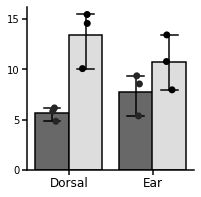

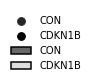

In [59]:
plot = 'GFP-_K10-dim'
fig, ax = plt.subplots(figsize = (3,3))
sbn.barplot(data = perc_df[plot].reset_index(), hue = 'Geno', y = plot, x = 'Tissue', hue_order = ['CON', 'CDKN1B'], ax = ax, 
            palette = ['#686868', "#DDDDDD"], alpha = 1, 
            errwidth=1.5, capsize = 0.2, errcolor = 'k', edgecolor = 'k')
plt.setp(ax.patches, linewidth=1.5)
handles, labels = ax.get_legend_handles_labels()
sbn.stripplot(data = perc_df[plot].reset_index(), hue = 'Geno', y = plot, x = 'Tissue', hue_order = ['CON', 'CDKN1B'], ax = ax, color = 'k', 
              alpha = 1, dodge = 0.5, s = 7)
ax.yaxis.set_major_locator(MaxNLocator(4, integer = True))
handles, labels = ax.get_legend_handles_labels()
ax.legend().remove()
[ax.spines[spine].set_visible(False) for spine in ['top','right']]
[ax.spines[spine].set_linewidth(1.5) for spine in ['bottom','left']]
[line.set_markeredgewidth(1.5) for line in ax.yaxis.get_ticklines()]
[line.set_markeredgewidth(1.5) for line in ax.xaxis.get_ticklines()]
[line.set_markersize(5) for line in ax.yaxis.get_ticklines()]
[line.set_markersize(5) for line in ax.xaxis.get_ticklines()]

ax.set_ylabel('')
ax.set_xticklabels(['Dorsal','Ear'], fontsize = 12)
ax.set_xlabel('')
#fig.savefig(os.path.join(fig_path, 'CDKN1B_ds_ear_GFP-neg_Krt10-dim_basal_cells.pdf'), bbox_inches = 'tight', dpi = 600)

fig, ax = plt.subplots(figsize = (0.1, 0.1))
ax.legend(handles = handles, labels = labels, frameon = False)
clean_axis(ax)

## Statistics

### Dorsal

In [61]:
plot = 'GFP-_K10-dim'
tmp = perc_df.reset_index()
a = tmp[(tmp['Geno'] == 'CDKN1B') & (tmp['Tissue'] == 'Ds')][plot].values
b = tmp[(tmp['Geno'] == 'CON') & (tmp['Tissue'] == 'Ds')][plot].values
stat, p = scipy.stats.ttest_ind(a, b)
print('p-value:', p)

p-value: 0.010600744457185379


### Ear

In [62]:
plot = 'GFP-_K10-dim'
tmp = perc_df.reset_index()
a = tmp[(tmp['Geno'] == 'CDKN1B') & (tmp['Tissue'] == 'ear')][plot].values
b = tmp[(tmp['Geno'] == 'CON') & (tmp['Tissue'] == 'ear')][plot].values
stat, p = scipy.stats.ttest_ind(a, b)
print('p-value:', p)

p-value: 0.21107181763561647
